## Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


Hourly Interstate 94 Westbound traffic volume between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

Few observations:
- There are no null values.
- There are 9 columns
- we need to change the date_time column type
- There are 48,204 rows

### Attribute Information:
- 'rain_1h' Numeric Amount in mm of rain that occurred in the hour
- 'snow_1h' Numeric Amount in mm of snow that occurred in the hour
- 'clouds_all' Numeric Percentage of cloud cover
- 'weather_main' Categorical Short textual description of the current weather
- 'weather_description' Categorical Longer textual description of the current weather
- 'date_time' DateTime Hour of the data collected in local CST time
- 'traffic_volume' Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [3]:
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


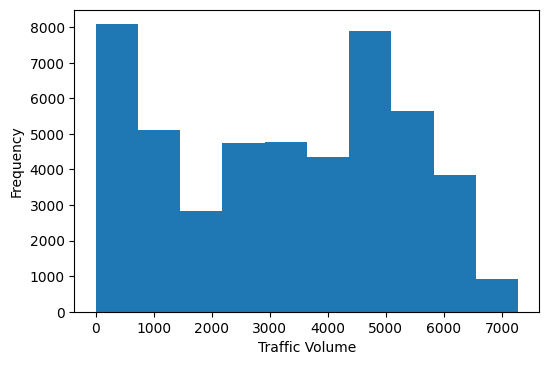

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Traffic Volume Observations
- Most frequent traffic volume ranges from 0 to 1000 and 4000 to 5000.
- The average traffic volume is 3380
- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

### Traffic Volume: Day vs. Night

In [6]:
traffic['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [7]:
daytime = traffic[(7 <= traffic['date_time'].dt.hour) & (traffic['date_time'].dt.hour < 19)]
nighttime = traffic[(19 <= traffic['date_time'].dt.hour) | (traffic['date_time'].dt.hour < 7)]

daytime['date_time'].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [8]:
nighttime['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

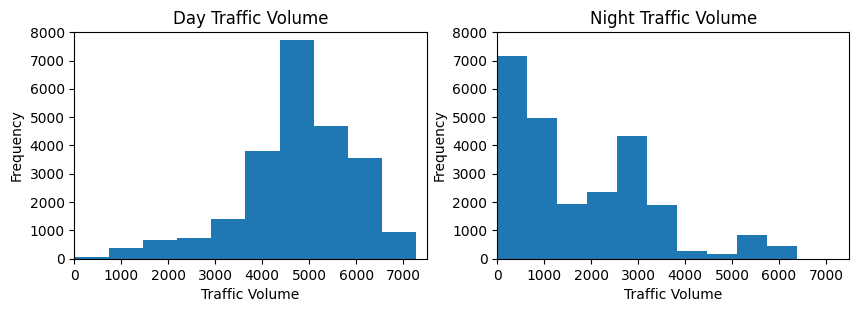

In [9]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Day Traffic Volume')
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.title('Night Traffic Volume')
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel('Traffic Volume')

plt.show()

In [10]:
print(nighttime['traffic_volume'].describe())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [11]:
print(daytime['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


### Summary Analysis of Traffic Volume

The Day Time Traffic Volume Histogram has a normal distribution. The Night Time Traffic Volume Histogram has a left-skewed distribution.

Traffic Volume at Night is light. Therefore we will no longer consider the night time data.

### Time Indicators

In [12]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean() #group the dataset by the month column with the mean as an aggregate function.
by_month['traffic_volume']

<ipython-input-12-169133530a34>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

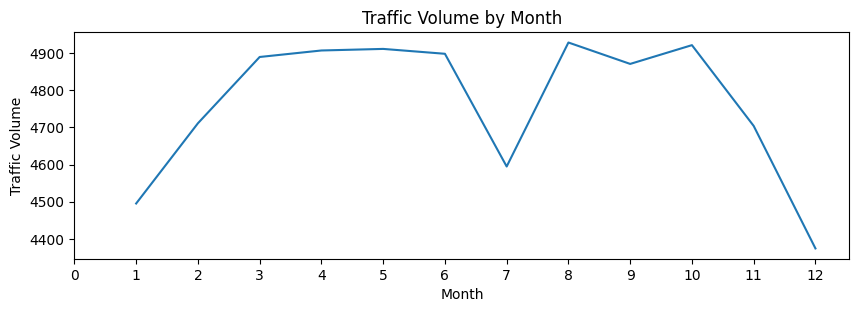

In [24]:
import numpy as np

plt.figure(figsize=(10,3))
plt.plot(by_month['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.title('Traffic Volume by Month')
plt.xticks(np.arange(0, 12+1, 1))
plt.show()

On this graph we generated a line plot showing how the traffic volume changed each month on average. In July there is a notable decrease in traffic volume. This may be due to children being out of school, which decreases the amount of school buses on the road and parents transporting their children.

In [21]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-21-88ced10f3bb7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

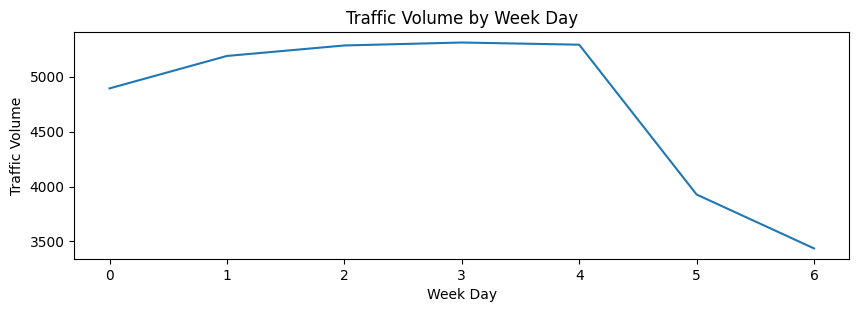

In [23]:
plt.figure(figsize=(10,3))
plt.plot(by_dayofweek['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Week Day')
plt.title('Traffic Volume by Week Day')
plt.xticks(np.arange(0, 6+1, 1))
plt.show()

Traffic decreases by ~74% on the weekends. Traffic hits max volumes on Friday and then substantially decreases by Saturday.

I'll now generate a line plot for the time of day. 

The weekends, however, will drag down the average values, so I am going to look at the averages separately. 

To do that, I'll start by splitting the data based on the day type: business day or weekend.

In [26]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-26-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



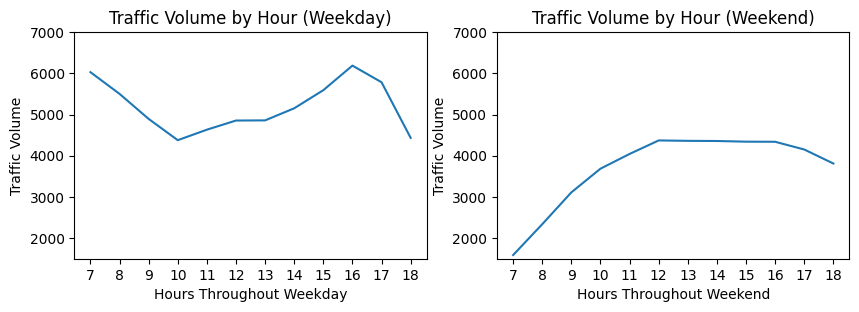

In [33]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Hours Throughout Weekday')
plt.title('Traffic Volume by Hour (Weekday)')
plt.ylim([1500, 7000])
plt.xticks(np.arange(7, 18+1, 1))

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Hours Throughout Weekend')
plt.title('Traffic Volume by Hour (Weekend)')
plt.ylim([1500, 7000])
plt.xticks(np.arange(7, 18+1, 1))

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

### Weather Indicators

In [36]:
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
dayofweek,-0.416453
hour,0.172704


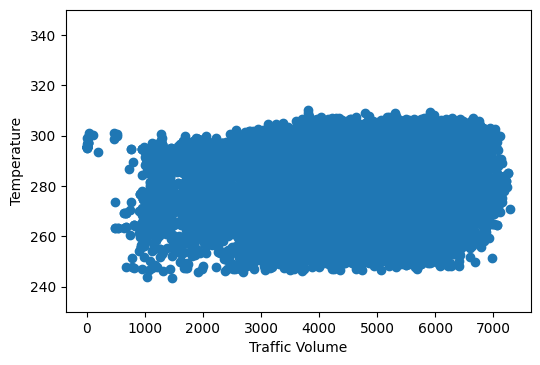

In [41]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylim([230,350])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

It doesn't look like there are strong correlations between weather columns and traffic. The temperature and traffic volume columns have the strongest correlation of 12.8%. The temperature ranges from 240K to 320k. 

In [45]:
daytime['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

### Weather Indicators

I am going to calculate the average traffic volume associated with each unique value in weather_main and weather_description. 

I grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [47]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

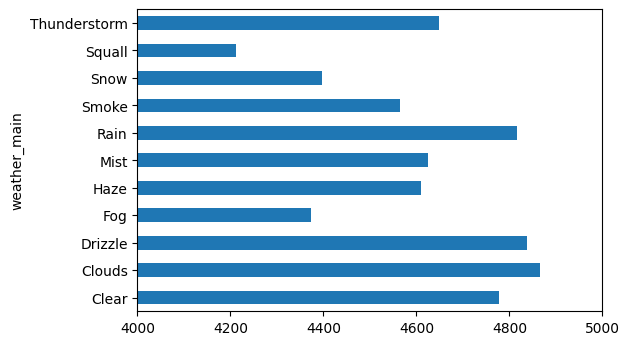

In [55]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlim([4000,5000])
plt.show()

On Average, there are no weather types that have traffic volumes exceeding 5000.

The weather types that indicate heavy traffic are rain, drizzle, and clouds.

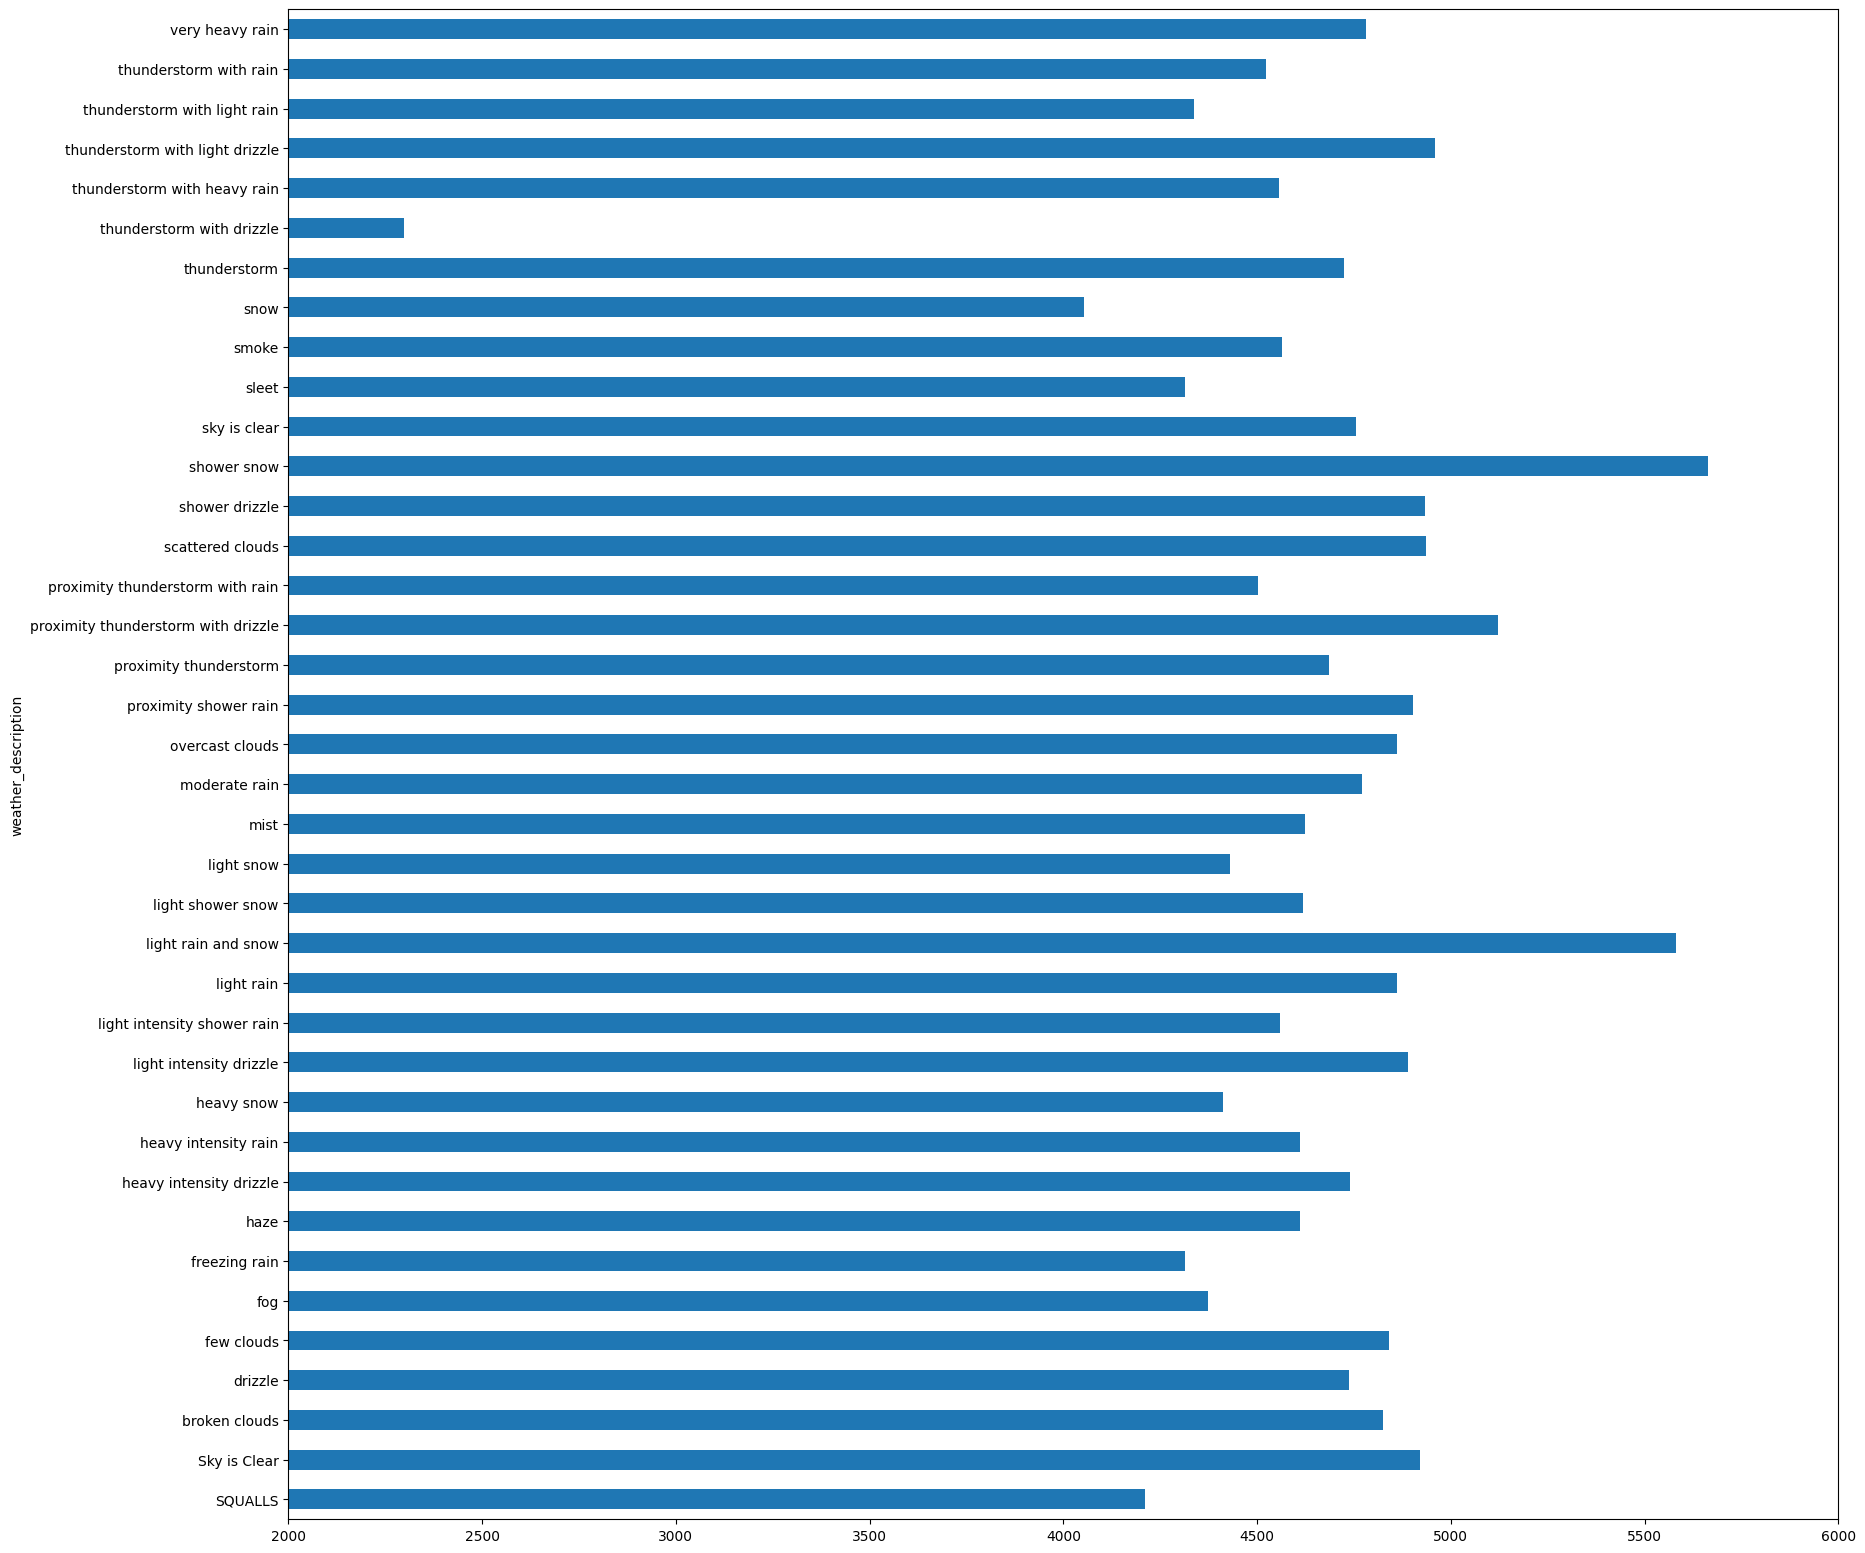

In [64]:
plt.figure(figsize=(20,20))
by_weather_description['traffic_volume'].plot.barh()
plt.xlim([2000,6000])
plt.show()

In [ ]:
There are groups where the traffic volumes exceed 5000. Ligh